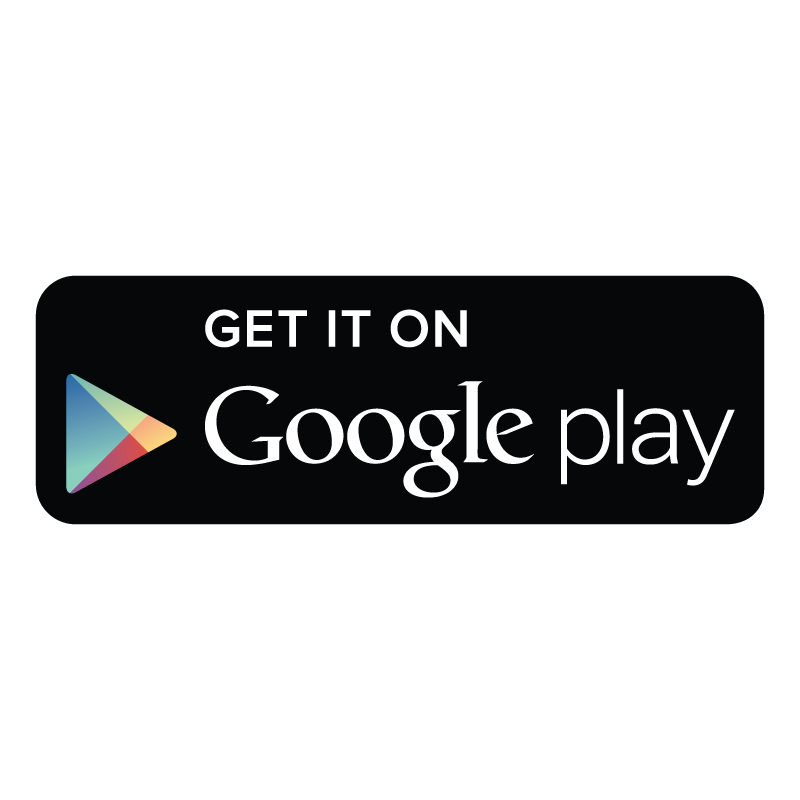

# Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

#  Two files:

# apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

# user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

## IMPORT THE DATA, DROP DUPLICATE ROWS, AND INSPECT THE DATA

In [2]:
# Reading in dataset
import pandas as pd
import numpy as np
apps_with_duplicates = pd.read_csv(r"E:\Desktop\DataCamp\PROJ_08_GOOGLE PLAY STORE APPS AND REVIEWS\archive\google_apps.csv")

# Dropping duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Printing the total number of apps
print('Total number of apps in the dataset = \n', apps.count())

# Having a look at a random sample of 5 rows
print(apps.head(5))

Total number of apps in the dataset = 
 App               10358
Category          10358
Rating             8893
Reviews           10358
Size              10358
Installs          10358
Type              10357
Price             10358
Content Rating    10357
Genres            10358
Last Updated      10358
Current Ver       10350
Android Ver       10355
dtype: int64
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159  19.0      10,000+  Free     0       Everyone   
1     967  14.0     500,000+  Free  

## DATA CLEANING

In [3]:
# Listing of the characters to remove
chars_to_remove = ["+", ",", "$"]
# Listing of the column names to clean
cols_to_clean = ["Installs", "Price"]

# Looping for each column in cols_to_clean
for col in cols_to_clean:
    # Looping for each char in chars_to_remove
    for char in chars_to_remove:
        # Replacing the character with an empty string
        apps.loc[:, col] = apps.loc[:, col].apply(lambda x: x.replace(char, ''))
        apps.loc[:, col] = apps.loc[:, col].apply(lambda x: x.replace(char, ''))
# Printing a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB
None


C:\Users\Sadat\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## CORRECTING DATA TYPES

In [4]:
# Converting Installs to float data type
apps.loc[:, "Installs"] = apps.loc[:, "Installs"].astype(float)

# Converting Price to float data type
apps.loc[:, "Price"] = apps.loc[:, "Price"].astype(float)

# Converting Size to float data type
apps.loc[:, "Size"] = apps.loc[:, "Size"].astype(float)

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB
None


## EXPLORING APP CATEGORIES

In [5]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Printing the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Counting the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sorting num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  34


## DISTRIBUTION OF APP RATINGS

In [6]:
# Measuring Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Making the Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Adding Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dash'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.189542336669298


## SIZE AND PRICE OF AN APP

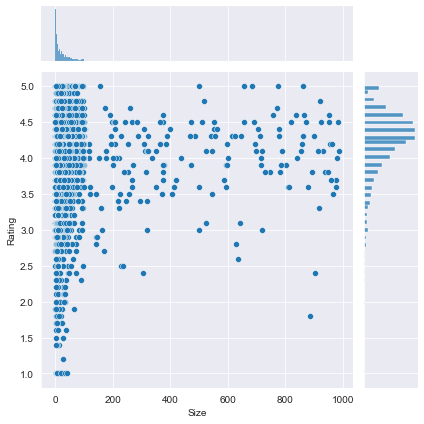

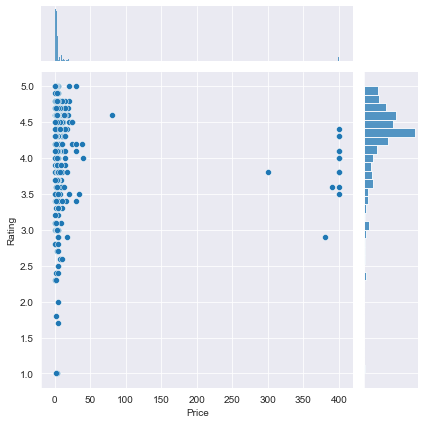

In [7]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Selecting rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subsetting for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plotting size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Selecting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plotting price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## RELATION BETWEEN APP CATEGORY AND APP PRICE

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


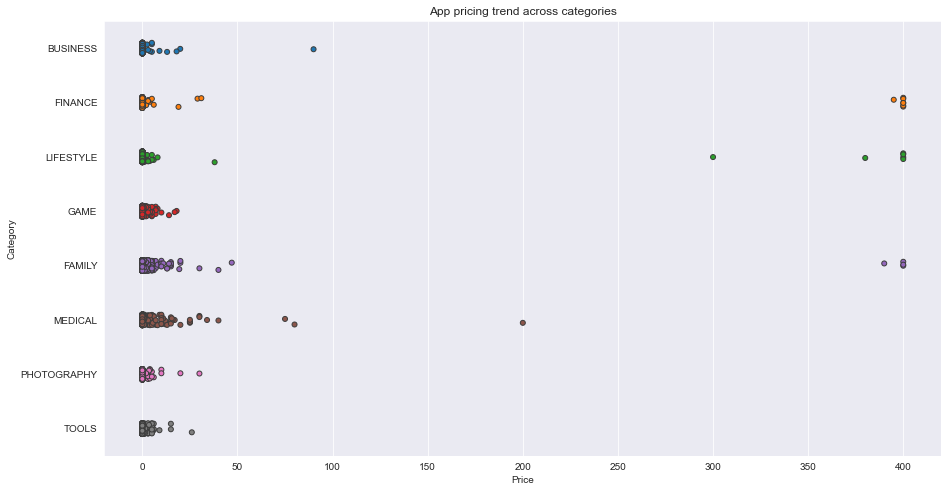

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecting a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examining the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Determining the Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## FILTER OUT 'JUNK' APPS

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

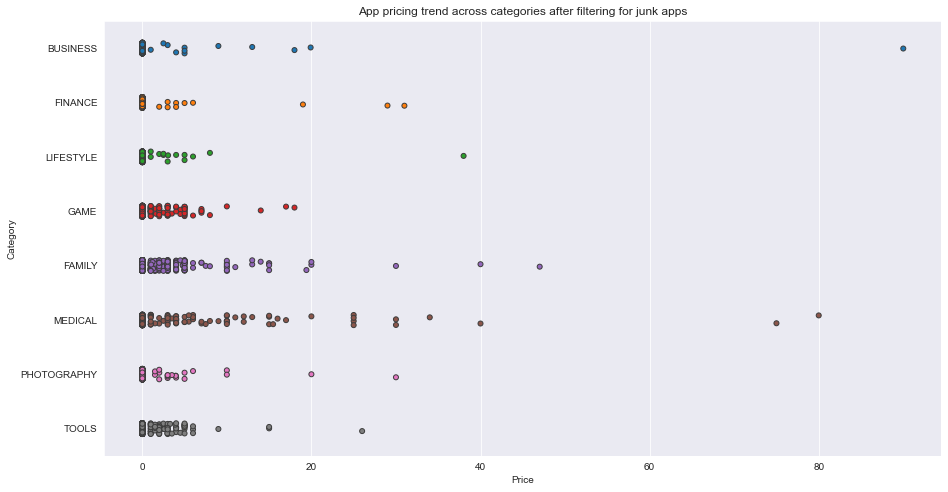

In [9]:
# Selecting apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examining price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## POPULARITY OF PAID APPS VS FREE APPS

In [10]:
trace0 = go.Box(
    # Subsetting Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Subsetting Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Adding trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## SENTIMENT ANALYSIS OF USER REVIEWS

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

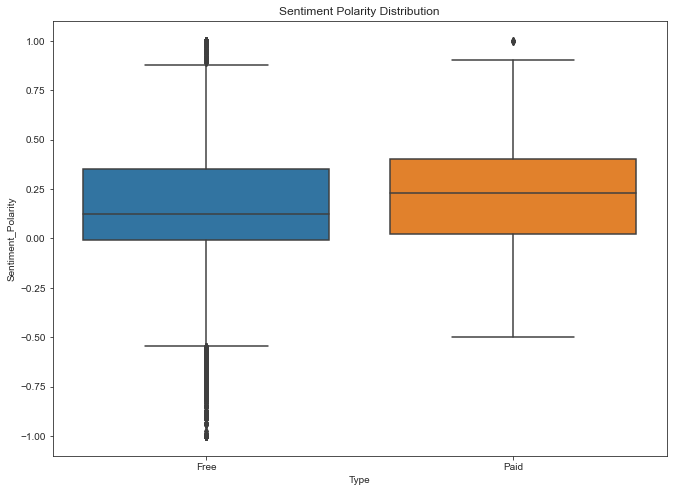

In [12]:
# Loading user_reviews.csv
reviews_df = pd.read_csv(r"E:\Desktop\DataCamp\PROJ_08_GOOGLE PLAY STORE APPS AND REVIEWS\archive\google_store_user_reviews.csv")

# Joining the two dataframes
merged_df = apps.merge(reviews_df)

# Dropping NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Measuring User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')